## End to End Machine Learning Project

*Chapter 2*

* 观察大局
* 获得数据
* 从训练集数据探索和可视化中获得洞见
* 准备用以输入机器学习算法的数据
* 选择和训练模型
* 微调模型
* 展示解决方案
* 启动、监控和维护你的系统

### 获得数据

In [30]:
import os
from six.moves import urllib
import tarfile
import pandas as pd

#download datasets
DOWN_PATH = os.path.join('datasets', 'housing')
DATA_URL = os.path.join('https://raw.githubusercontent.com/ageron/handson-ml/master', DOWN_PATH, 'housing.tgz')
def fetch_datasets(data_url=DATA_URL, down_path=DOWN_PATH):
    if not os.path.isdir(down_path):
        os.makedirs(down_path)
    urllib.request.urlretrieve(data_url, down_path)
    tgz_path = os.path.join(down_path, 'housing.tgz')
    tarfile.open(tgz_path)
    tgz_path.extractall(path=down_path)
    tarfile.close(tgz_path)
#fetch_datasets()

#load datasets
def load_datasets(data_path=DOWN_PATH):
    csv_path = os.path.join(data_path, 'housing.csv')
    return pd.read_csv(csv_path)
data = load_datasets()

## 从训练集数据探索和可视化中获得洞见

*对整个数据的初步认识*

In [31]:
#check the datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [34]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [35]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa44c469d30>,
      dtype=object)

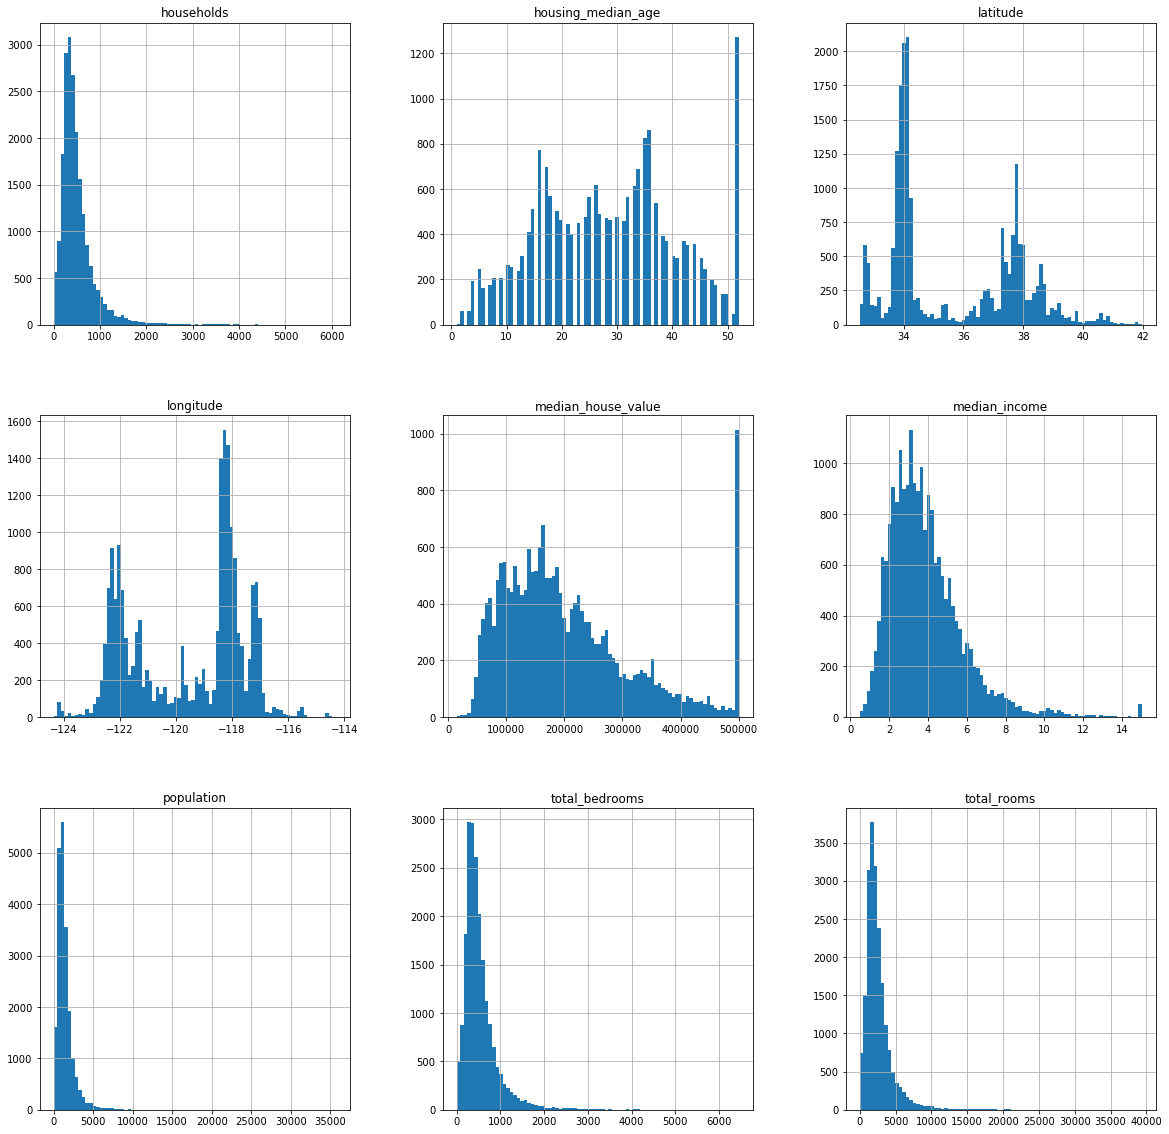

In [36]:
import matplotlib as plt
data.hist(bins=80,figsize=(20,20))

### 分离出测试集

* 分层抽样出测试集
* 对收入分层抽样，不能分太多层
* 分层方法：除以1.5，向上取整；然后合并大于5的分类
* 抽样得到训练集与测试集

### 对训练集数据进一步探索

* 地理数据可视化，用其他相关属性作为颜色，和散点大小
* 寻找与标签相关性高的属性，用df.corr()['labels']
* 进一步考察高相关性属性的数据模式，并删除可能的错误数据
* 尝试不同的属性组合，以找到高相关性特征

### 准备数据

* 将预测器与标签分离，因为可能不一定对它们使用相同的转换方式 

### 数据清理

* 处理缺失数据（删除对应的特征、删除坏点、补齐缺失点）
* 处理文本和分类属性（转换为数字，onehot向量）
* 自定义转换器
* 特征缩放（归一化、标准化），即同比缩放所有属性。注意：目标值一般不进行绽放，并且只对训练集缩放
* 转换流水线 pipline()

## 选择和训练模型

* 用sklearn中模型的方法fit()来训练模型
* 评估训练得的模型，对训练集求RMSE或MAE
* 误差较大则拟合不足，可以
 *  1.选择更强大的模型
 *  2.为算法提供更好的特征
 *  3.减少正则化
* 误差过小？则用验证集来验证得到的模型，以检查是否过拟合
 * 1.将训练集分为较小的训练集与验证集
 * 2.交叉验证，可以sklearn的K-fold功能
* 如果在验证集上得到的误差大则说明确实有过拟合，需要更换模型
* 尝试多个模型以找到2-5个有效的模型，别花太多时间去调整超参数
* 保存每个尝试过的模型，用pickel或sklearn的joblib